<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Проверим-качество-линейной-регрессии-до-преобразования-признаков" data-toc-modified-id="Проверим-качество-линейной-регрессии-до-преобразования-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверим качество линейной регрессии до преобразования признаков</a></span></li><li><span><a href="#Проверим-качество-линейной-регрессии-после-признаков" data-toc-modified-id="Проверим-качество-линейной-регрессии-после-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверим качество линейной регрессии после признаков</a></span></li></ul></li></ul></div>

# Шифрование данных клиентов

Нам нужно защитить перноснальные данные клиентов страховой компании. Нужно разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Чтобы изучить данные таблиц, сделать необходимые рассчёты и провести исследование сразу импортируем библиотеки, который нам потребуются в данном проекте:

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

Напишем функцию, которая будет отображать основные показатели датасета и строить корреляционную матрицу

In [2]:
def df_info(df):
    """Изучение датасета"""
    print('\nПервые 10 строчек датафрейма')
    display(df.head(10))
    print('\nИнформация о датафрейме\n')
    display(df.info())
    print('\nРасчёт значений в каждом столбце')
    display(df.describe())
    print('\nКоличество дубликатов =', df.duplicated().sum())
    print('\nЧисло пропусков в каждом столбце')
    display(df.isna().sum())
    print('\nПостроение корреляционной матрицы')
    plt.figure(figsize=(12,12))
    corr_matrix = sns.heatmap(df.corr(), annot=True)
    corr_matrix.axes.set_title("\nКорреляционная матрица", fontsize=5)

Прочитаем файл и сохраним его

In [3]:
df = pd.read_csv('C:\\Users\\Дмитрий\\github\\projects\\projects\\Encryption of customer data\\insurance.csv') 

Изучим датасет


Первые 10 строчек датафрейма


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0



Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None


Расчёт значений в каждом столбце


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



Количество дубликатов = 153

Число пропусков в каждом столбце


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


Построение корреляционной матрицы


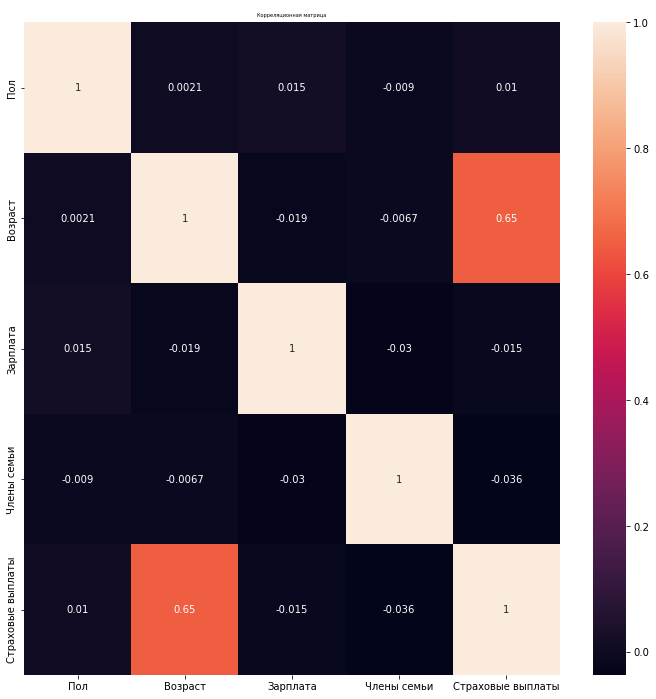

In [4]:
df_info(df)

В основной таблице 5 столбцов. Типы данных в столбцах - int64, float64.

Согласно документации данные можно описать так:
* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
* Целевой признак: количество страховых выплат клиенту за последние 5 лет.

Удалим дубликаты

In [5]:
df = df.drop_duplicates()

**Вывод**
<br><br>
Данные были изучены, дубли в данных были удалены.
<br>
Целевой признак сильнее всего коррелирует с возрастом клиента, но уровень корреляции не настолько большой, чтобы по нему одному можно было делать предсказания.
<br>
Теперь можно приступить к работе с данными.
<br>

## Умножение матриц

Чтобы записать формулу внутри текста, окружим её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

## Алгоритм преобразования

**Алгоритм**
<br>Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
1. Сформируем случайную матрицу нужного размера $P$
2. Проверим, что матрица $P$ является обратимой. Для этого должно выполняться условие - произведение обратной квадратной матрицы $A$ на саму квадратную матрицу $А$ равно единичной матрице:  $AA^{-1}=A^{-1}A=PP^{-1}=E$
3. Умножим матрицу признаков $X$ на случайную обратимую матрицу $P$ и получим матрицу преобразованных признаков
4. Проверим корректность наших действий умножив матрицу преобразованных признаков на обратную матрицу $P$. Мы должны получить в результате снова матрицу признаков $X$

**Обоснование**
<br><br>Матрица $P$ должна иметь размер $m*m$, где $m$ является количеством признаков матрицы $X$.
<br>Тогда матрица преобразованных признаков будет иметь размер матрицы $X$.
<br>Чтобы доказать и обосновать корректность нашего алгоритма, проведём эксперемент на двух случайных маленьких матрицах, одна из которых является обратимой. 
<br>Проведя преобразование через умножение матриц, потом вернёмся обратно к исходным данным проведя ещё одно умножение на обратную матрицу к матрице на которую умножали изначально. 


In [6]:
X1 = np.random.randint(1, 10, (10, 3)) # зададим случайную матрицу размером 10 на 3 из целых чисел от 1 до 10
X1

array([[8, 5, 9],
       [8, 7, 5],
       [1, 9, 9],
       [2, 7, 1],
       [3, 4, 8],
       [7, 9, 3],
       [3, 7, 1],
       [2, 2, 6],
       [2, 3, 5],
       [7, 5, 8]])

In [7]:
P1 = np.random.randint(1, 5, (3, 3)) # зададим случайную квадратную матрицу размером 3 на 3 из целых чисел от 1 до 5
P1

array([[3, 3, 4],
       [4, 1, 2],
       [2, 3, 4]])

In [8]:
np.linalg.inv(P1) @ P1 # проверим, что матрица является обратимой умножив матрицу на такую же обратную матрицу

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
Z = X1 @ P1 # преобразуем данные - получим матрицу преобразованных признаков
Z

array([[62, 56, 78],
       [62, 46, 66],
       [57, 39, 58],
       [36, 16, 26],
       [41, 37, 52],
       [63, 39, 58],
       [39, 19, 30],
       [26, 26, 36],
       [28, 24, 34],
       [57, 50, 70]])

In [10]:
Z @ np.linalg.inv(P1) # вернемся к изначальной матрице умножив преобразованную матрицу на обратную матрицу P1

array([[8., 5., 9.],
       [8., 7., 5.],
       [1., 9., 9.],
       [2., 7., 1.],
       [3., 4., 8.],
       [7., 9., 3.],
       [3., 7., 1.],
       [2., 2., 6.],
       [2., 3., 5.],
       [7., 5., 8.]])

Таким образом, мы видим, что наш алгоритм рабочий. 
<br>Он может зашифровать с помощью матричного умножения на квадратную обратимую матрицу данные клиентов, а когда потребуется, мы можем вернуться к оригинальному виду с помощью умножения преобразованных данных на обратную матрицу к матрице на которую умножали изначально.

## Проверка алгоритма

### Проверим качество линейной регрессии до преобразования признаков

Разделим наш датафрейм на признаки обучающие и тестовые и целевой признак на обучающий и целевой

In [11]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

Напишем собственную модель линейной регрессии

In [12]:
class LinearRegressionMy:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T @ X) @ X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим модель линейной регрессии библиотеки `sklearn` и посмотрим каким будет значение R2:

In [13]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
r2_model = r2_score(target_test, predictions)
print(r2_model)

0.42307727492147573


Обучим модель линейной регрессии с помощью собственного класса `LinearRegressionMy` и посмотрим каким будет значение R2:

In [14]:
model_my = LinearRegressionMy()
model_my.fit(features_train, target_train)
predictions_my = model_my.predict(features_test)
r2_model_my = r2_score(target_test, predictions_my)
print(r2_model_my)

0.4230772749214826


### Проверим качество линейной регрессии после признаков

Создадим случайную квадратную матрицу размером 5 на 5 из чисел от 0 до 1

In [15]:
P = np.random.randint(1, 5, (4, 4))
P

array([[3, 1, 1, 2],
       [2, 1, 4, 2],
       [3, 1, 4, 3],
       [1, 4, 2, 4]])

Проверим, что матрица является обратимой умножив матрицу на такую же обратную матрицу

In [16]:
np.linalg.inv(P) @ P

array([[ 1.00000000e+00, -1.11022302e-16, -6.66133815e-16,
        -3.33066907e-16],
       [ 0.00000000e+00,  1.00000000e+00, -8.88178420e-16,
         0.00000000e+00],
       [ 0.00000000e+00, -5.55111512e-17,  1.00000000e+00,
        -1.11022302e-16],
       [ 4.44089210e-16,  2.22044605e-16,  1.77635684e-15,
         1.00000000e+00]])

Преобразуем данные `features` с помощью матрицы $P$

In [17]:
features_converted = pd.DataFrame((np.array(features) @ P), index=features.index, columns=features.columns)
features_converted.head(10)

,Пол,Возраст,Зарплата,Члены семьи
0,148886.0,49646.0,198567.0,148888.0
1,114093.0,38050.0,152186.0,114096.0
2,63058.0,21029.0,84116.0,63058.0
3,125144.0,41729.0,166888.0,125150.0
4,78359.0,26129.0,104513.0,78358.0
5,123091.0,41052.0,164177.0,123096.0
6,119183.0,39748.0,158961.0,119188.0
7,115857.0,38642.0,154509.0,115868.0
8,149176.0,49741.0,198947.0,149178.0
9,155168.0,51737.0,206931.0,155170.0


Разделим наши преобразованные признаки и исходный целевой признак на признаки обучающие и тестовые и целевой признак на обучающий и целевой

In [18]:
features_train_converted, features_test_converted, target_train_converted, target_test_converted = train_test_split(
    features_converted, target, test_size=0.25, random_state=12345)

Обучим модель линейной регрессии библиотеки `sklearn` и посмотрим каким будет значение R2:

In [19]:
model_converted = LinearRegression()
model_converted.fit(features_train_converted, target_train_converted)
predictions_converted = model_converted.predict(features_test_converted)
r2_model_converted = r2_score(target_test_converted, predictions_converted)
print(r2_model_converted)

0.4230772749214322


Обучим модель линейной регрессии с помощью собственного класса `LinearRegressionMy` и посмотрим каким будет значение R2

In [20]:
model_converted_my = LinearRegressionMy()
model_converted_my.fit(features_train_converted, target_train_converted)
predictions_converted_my = model_converted_my.predict(features_test_converted)
r2_model_converted_my = r2_score(target_test_converted, predictions_converted_my)
print(r2_model_converted_my)

0.4230772638231117


Сравним показатели качества, которые выдают обе модели обученных на преобразованных и непреобразованных признаках, они должны совпадать 

In [21]:
result = pd.DataFrame([r2_model, r2_model_my, r2_model_converted, r2_model_converted_my],
                      index=['LinearRegression до преобразования', 'LinearRegressionMy до преобразования', 
                             'LinearRegression после преобразования', 'LinearRegressionMy после преобразования'], 
                      columns=['R2'])
result

,R2
LinearRegression до преобразования,0.423077
LinearRegressionMy до преобразования,0.423077
LinearRegression после преобразования,0.423077
LinearRegressionMy после преобразования,0.423077


**Вывод**

С помощью матричного умножения удалось  успешно зашифровать данные клиентов, чтобы по ним нельзя было понять реальные данные. Показатели качества метрики R2 при этом не изменились до преобразования признаков и после преобразования признаков на модели `LinearRegression` от `sklearn` и  на собственной модели линейной регрессии `LinearRegressionMy`.